### Load a split of transactions data, and do the following

In [1]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset
transactions = pd.read_csv('C:\\Kaggle competetion datasets\\Elo Merchent Category Recommendation\\historical_transactions.csv', 
                        nrows = 500000)
transactions.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


1. Understand the summary and structure of the data

In [3]:
transactions.describe()

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,461378.000000,500000.000000,500000.000000
mean,127.698758,0.502186,470.068862,-5.046724,-0.407912,2.185453,10.681738,27.497640
std,102.815116,2.205930,248.869232,3.696011,44.912295,1.530376,6.257153,9.524456
min,-1.000000,-1.000000,-1.000000,-13.000000,-0.746908,1.000000,-1.000000,-1.000000
25%,53.000000,0.000000,278.000000,-8.000000,-0.722069,1.000000,9.000000,19.000000
50%,88.000000,0.000000,437.000000,-4.000000,-0.694315,1.000000,9.000000,33.000000
75%,211.000000,1.000000,705.000000,-2.000000,-0.621406,3.000000,15.000000,34.000000
max,347.000000,999.000000,891.000000,0.000000,19536.621128,5.000000,24.000000,41.000000


In [4]:
# In this data, few of the columns are normalised. [Installments, Month Lag, Purchase Amount]
# The mean of the installments is 0 and min is -1, but have 999 has max value [ Eventhough Normalised ]
# Similar thing happening with the Purchase amount.

In [5]:
print(transactions.shape,'\n')
transactions.info()

(500000, 14) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 14 columns):
authorized_flag         500000 non-null object
card_id                 500000 non-null object
city_id                 500000 non-null int64
category_1              500000 non-null object
installments            500000 non-null int64
category_3              498443 non-null object
merchant_category_id    500000 non-null int64
merchant_id             497940 non-null object
month_lag               500000 non-null int64
purchase_amount         500000 non-null float64
purchase_date           500000 non-null object
category_2              461378 non-null float64
state_id                500000 non-null int64
subsector_id            500000 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 53.4+ MB


In [6]:
# Categorical Variables present in this dataset are
'''
authorized_flag
city_id
category_1
category_2
category_3
merchant_category_id
state_id
subsector_id

'''

'\nauthorized_flag\ncity_id\ncategory_1\ncategory_2\ncategory_3\nmerchant_category_id\nstate_id\nsubsector_id\n\n'

2. Find out in each of the categorical features, number of distinct values

In [7]:
print('Distinct Values in authorized_flag' + '\t', len(transactions.authorized_flag.unique()))
print('Distinct Values in city_id' + '\t\t', len(transactions.city_id.unique()))
print('Distinct Values in category_1' + '\t\t', len(transactions.category_1.unique()))
print('Distinct Values in category_2' + '\t\t', len(transactions.category_2.unique()))
print('Distinct Values in category_3' + '\t\t', len(transactions.category_3.unique()))
print('Distinct Values in merchant_category_id ', len(transactions.merchant_category_id.unique()))
print('Distinct Values in state_id' + '\t\t', len(transactions.state_id.unique()))
print('Distinct Values in subsector_id' + '\t\t', len(transactions.subsector_id.unique()))

Distinct Values in authorized_flag	 2
Distinct Values in city_id		 304
Distinct Values in category_1		 2
Distinct Values in category_2		 6
Distinct Values in category_3		 4
Distinct Values in merchant_category_id  287
Distinct Values in state_id		 25
Distinct Values in subsector_id		 41


In [8]:
print('Distinct Card_id count   ', len(transactions.card_id.unique()))
transactions.category_2.unique()

Distinct Card_id count    2400


array([ 1., nan,  3.,  5.,  2.,  4.])

In [9]:
# Note: 
# In Category_2 column, there are totally 5 categories. but NAN is also counted as new level.

3. Understand the number of unique credit card count in for each level in each category.  
Example:  
In category_2, there are 5 levels. In each level find out the the number of credit card customers.  
  
Output might look like this:  
level1  100  
level2  300  
level3  50  
level4  200  
level5  30  

On the count, plot a histogram(%) and cummulative histogram with percentage(%). Check the options of histogram plots in matplotlib.  
Histogram will show overall distribution. But Cummulative histogram will give you better idea of the number of categories having the bigger portion.  

In [41]:
auth_flag_df = transactions.groupby('card_id')['authorized_flag'].nunique()
print(auth_flag_df.head(10),'\n')

auth_flag_df_1 = transactions.groupby('authorized_flag')['card_id'].nunique()
print(auth_flag_df_1,'\n')

auth_flag_1 = transactions.groupby('authorized_flag')
auth_flag_1 = auth_flag_1['card_id'].nunique()
print(auth_flag_1, '\n')

city_id_df = transactions.groupby('city_id')['card_id'].nunique()
city_id_df.head()



card_id
C_ID_002198cdf1    2
C_ID_0032aebb26    2
C_ID_003839dd44    2
C_ID_0046db9f8a    2
C_ID_00727b1b66    2
C_ID_007eaf8be8    2
C_ID_00a2ac940d    2
C_ID_00afd0d796    2
C_ID_00c4e6c660    2
C_ID_011780608d    2
Name: authorized_flag, dtype: int64 

authorized_flag
N    2248
Y    2400
Name: card_id, dtype: int64 

authorized_flag
N    2248
Y    2400
Name: card_id, dtype: int64


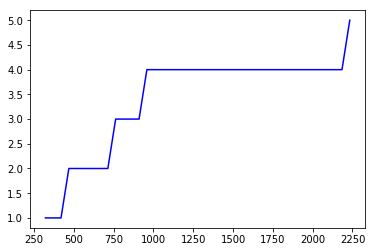

In [74]:
values, base = np.histogram(cat2_df, bins=40)
#evaluate the cumulative
cumulative = np.cumsum(values)
# plot the cumulative function
plt.plot(base[:-1], cumulative, c='blue')
plt.show()

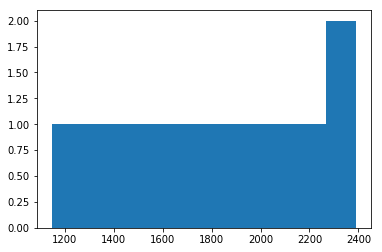

In [75]:
plt.hist(cat1_df, cumulative=True)
plt.show()

In [44]:
merch_cat_id_df = transactions.groupby('merchant_category_id')['card_id'].nunique()
print(merch_cat_id_df.head())

state_id_df = transactions.groupby('state_id')['card_id'].nunique()
print(state_id_df.head())

subsector_id_df = transactions.groupby('subsector_id')['card_id'].nunique()
print(subsector_id_df.head())

merchant_category_id
-1      13
 2     376
 9     112
 14     64
 16     14
Name: card_id, dtype: int64
state_id
-1    1354
 1     107
 2     126
 3     177
 4     235
Name: card_id, dtype: int64
subsector_id
-1      13
 1    1828
 2     644
 3     289
 4     317
Name: card_id, dtype: int64


In [18]:
len(transactions.merchant_category_id.unique())

287

In [46]:
cat1_df = transactions.groupby('category_1')['card_id'].nunique()
print(cat1_df.head())

cat2_df = transactions.groupby('category_2')['card_id'].nunique()
print(cat2_df.head())

cat3_df = transactions.groupby('category_3')['card_id'].nunique()
print(cat3_df.head())

category_1
N    2391
Y    1146
Name: card_id, dtype: int64
category_2
1.0    2282
2.0     322
3.0     782
4.0     484
5.0     978
Name: card_id, dtype: int64
category_3
A    1426
B    1941
C    1072
Name: card_id, dtype: int64


In [10]:
trans_data = pd.read_csv('C:\\Kaggle competetion datasets\\Elo Merchent Category Recommendation\\historical_transactions.csv',
                        usecols=['card_id','merchant_category_id'])

In [11]:
trans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29112361 entries, 0 to 29112360
Data columns (total 2 columns):
card_id                 object
merchant_category_id    int64
dtypes: int64(1), object(1)
memory usage: 444.2+ MB


In [ ]:
# each card lo enthamandi merchants
# each merchnt lo enni card


In [12]:
card_merchant = trans_data.groupby('card_id').apply(lambda x: x.merchant_category_id.nunique())
card_merchant.head()

card_id
C_ID_00007093c1    18
C_ID_0001238066    29
C_ID_0001506ef0    19
C_ID_0001793786    48
C_ID_000183fdda    36
dtype: int64

(array([1.1284e+04, 1.7449e+04, 3.5962e+04, 2.6782e+04, 2.7152e+04,
        3.8427e+04, 2.3644e+04, 2.1392e+04, 2.7706e+04, 1.5425e+04,
        1.3330e+04, 1.6522e+04, 8.7330e+03, 7.5150e+03, 9.0330e+03,
        4.7810e+03, 3.9430e+03, 4.6380e+03, 2.4280e+03, 1.9360e+03,
        2.2890e+03, 1.1200e+03, 1.2920e+03, 6.3000e+02, 5.0000e+02,
        5.8100e+02, 2.5200e+02, 2.0800e+02, 2.3600e+02, 1.1300e+02,
        7.3000e+01, 7.0000e+01, 3.0000e+01, 2.0000e+01, 2.4000e+01,
        8.0000e+00, 2.0000e+00, 6.0000e+00, 3.0000e+00, 1.0000e+00]),
 array([ 1.  ,  3.35,  5.7 ,  8.05, 10.4 , 12.75, 15.1 , 17.45, 19.8 ,
        22.15, 24.5 , 26.85, 29.2 , 31.55, 33.9 , 36.25, 38.6 , 40.95,
        43.3 , 45.65, 48.  , 50.35, 52.7 , 55.05, 57.4 , 59.75, 62.1 ,
        64.45, 66.8 , 69.15, 71.5 , 73.85, 76.2 , 78.55, 80.9 , 83.25,
        85.6 , 87.95, 90.3 , 92.65, 95.  ]),
 <a list of 40 Patch objects>)

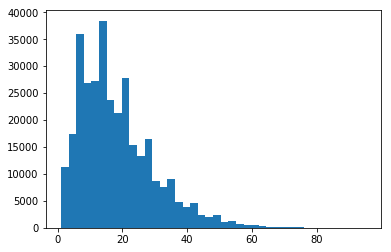

In [13]:
plt.hist(card_merchant, bins=40)

(array([1.47499605e-02, 2.28085838e-02, 4.70079828e-02, 3.50082808e-02,
        3.54919290e-02, 5.02301250e-02, 3.09064219e-02, 2.79627042e-02,
        3.62160940e-02, 2.01628979e-02, 1.74244038e-02, 2.15968492e-02,
        1.14154028e-02, 9.82328543e-03, 1.18075499e-02, 6.24951799e-03,
        5.15412036e-03, 6.06259452e-03, 3.17377738e-03, 2.53065610e-03,
        2.99208255e-03, 1.46401593e-03, 1.68884694e-03, 8.23508959e-04,
        6.53578539e-04, 7.59458262e-04, 3.29403583e-04, 2.71888672e-04,
        3.08489070e-04, 1.47708750e-04, 9.54224666e-05, 9.15009954e-05,
        3.92147123e-05, 2.61431415e-05, 3.13717699e-05, 1.04572566e-05,
        2.61431415e-06, 7.84294246e-06, 3.92147123e-06, 1.30715708e-06]),
 array([ 1.  ,  3.35,  5.7 ,  8.05, 10.4 , 12.75, 15.1 , 17.45, 19.8 ,
        22.15, 24.5 , 26.85, 29.2 , 31.55, 33.9 , 36.25, 38.6 , 40.95,
        43.3 , 45.65, 48.  , 50.35, 52.7 , 55.05, 57.4 , 59.75, 62.1 ,
        64.45, 66.8 , 69.15, 71.5 , 73.85, 76.2 , 78.55, 80.9 , 8

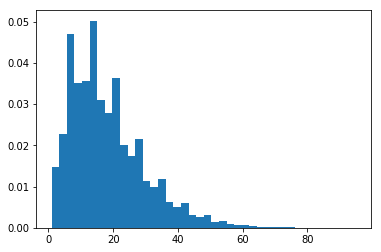

In [14]:
plt.hist(card_merchant, bins=40, density = True)

(array([0.03466241, 0.08826258, 0.19873134, 0.2810008 , 0.36440683,
        0.48244763, 0.55507772, 0.62079007, 0.70589789, 0.7532807 ,
        0.79422805, 0.84498065, 0.87180684, 0.89489156, 0.92263931,
        0.93732567, 0.94943786, 0.96368495, 0.97114333, 0.97709037,
        0.98412177, 0.9875622 , 0.99153099, 0.99346624, 0.99500215,
        0.99678688, 0.99756098, 0.99819991, 0.99892486, 0.99927198,
        0.99949622, 0.99971125, 0.9998034 , 0.99986484, 0.99993856,
        0.99996314, 0.99996928, 0.99998771, 0.99999693, 1.        ]),
 array([ 1.  ,  3.35,  5.7 ,  8.05, 10.4 , 12.75, 15.1 , 17.45, 19.8 ,
        22.15, 24.5 , 26.85, 29.2 , 31.55, 33.9 , 36.25, 38.6 , 40.95,
        43.3 , 45.65, 48.  , 50.35, 52.7 , 55.05, 57.4 , 59.75, 62.1 ,
        64.45, 66.8 , 69.15, 71.5 , 73.85, 76.2 , 78.55, 80.9 , 83.25,
        85.6 , 87.95, 90.3 , 92.65, 95.  ]),
 <a list of 40 Patch objects>)

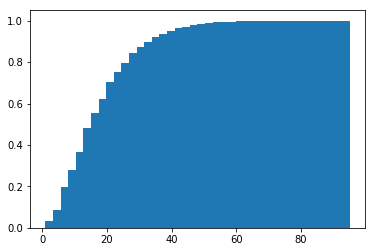

In [15]:
plt.hist(card_merchant, bins=40, density = True, cumulative=True)

In [16]:
merchant_card = trans_data.groupby('merchant_category_id').apply(lambda x:x.card_id.nunique() )
merchant_card.head()

merchant_category_id
-1      1364
 2     28107
 9      6760
 11       22
 14     4797
dtype: int64

(array([0.63608563, 0.73700306, 0.78899083, 0.83486239, 0.85626911,
        0.88990826, 0.89908257, 0.91131498, 0.9204893 , 0.92966361,
        0.93272171, 0.94189602, 0.95412844, 0.95412844, 0.95718654,
        0.96024465, 0.96636086, 0.96941896, 0.96941896, 0.97247706,
        0.97247706, 0.97859327, 0.98165138, 0.98165138, 0.98165138,
        0.98165138, 0.98165138, 0.98165138, 0.98470948, 0.98776758,
        0.98776758, 0.99082569, 0.9969419 , 0.9969419 , 0.9969419 ,
        0.9969419 , 0.9969419 , 0.9969419 , 0.9969419 , 1.        ]),
 array([1.000000e+00, 7.109900e+03, 1.421880e+04, 2.132770e+04,
        2.843660e+04, 3.554550e+04, 4.265440e+04, 4.976330e+04,
        5.687220e+04, 6.398110e+04, 7.109000e+04, 7.819890e+04,
        8.530780e+04, 9.241670e+04, 9.952560e+04, 1.066345e+05,
        1.137434e+05, 1.208523e+05, 1.279612e+05, 1.350701e+05,
        1.421790e+05, 1.492879e+05, 1.563968e+05, 1.635057e+05,
        1.706146e+05, 1.777235e+05, 1.848324e+05, 1.919413e+05,
      

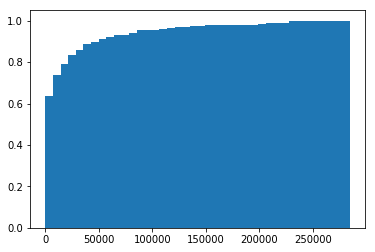

In [17]:
plt.hist(merchant_card, bins=40, density = True, cumulative=True)

In [21]:
merchant = trans_data.groupby('merchant_category_id').apply(lambda x:len(x)).reset_index()
merchant.head()

,merchant_category_id,0
0,-1,2252
1,2,46162
2,9,13806
3,11,38
4,14,10225


In [ ]:
plt.hist(merchant, bins=40, density = True, cumulative=True)

In [22]:
merchant.columns = ['merchant_category_id', 'frequency']

In [29]:
merchant['frequency_cum'] = merchant['frequency'].cumsum()

merchant['freq_cum_%'] = merchant.loc[:, 'frequency_cum'].div(np.max(merchant['frequency_cum'], axis=0))
merchant.tail(10)

,merchant_category_id,frequency,frequency_cum,freq_cum_%
317,873,1840,27250393,0.936042
318,875,1,27250394,0.936042
319,878,124,27250518,0.936046
320,879,1430607,28681125,0.985187
321,881,101,28681226,0.985191
322,882,1,28681227,0.985191
323,884,416465,29097692,0.999496
324,885,7555,29105247,0.999756
325,889,677,29105924,0.999779
326,891,6437,29112361,1.000000


In [28]:
np.max(merchant['frequency_cum'])

29112361

In [ ]:
# each merchant dagara entha % transactions unnay